<a href="https://colab.research.google.com/github/sokanaid/CourseProject2022BiologicalMath/blob/main/data_smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сглаживание результатов симуляций

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/sim_tables

Mounted at /content/drive/
/content/drive/MyDrive/sim_tables


## Чтение данных

In [3]:
def read_csv_file(directory_path, name):
  file_path = os.path.join(directory_path, name + ".csv")
  print("read file ", file_path)
  return pd.read_csv(file_path)

In [4]:
def read_description(directory_path, file_name = "description.txt"):
  file_path = os.path.join(directory_path, file_name)
  print("read description from file  ", file_path)
  with open(file_path, 'r') as file:
    return file.read()


In [5]:
def read_files(directory_path):
  data = {}
  # описание параметров
  data["description_str"] = read_description(directory_path)
  # численность популяции
  data["population"] = read_csv_file(directory_path, "population")
  data["population"].drop(data["population"].tail(1).index, inplace=True)
  data["population"].rename(columns={"Unnamed: 0": 'epochs'}, inplace=True)
  # результаты последовательных сглаживаний численности популяции
  for count in range(1, 11):
    name = "exp_pop"+(str(count) if count!=1 else "")
    data[name] = read_csv_file(directory_path, name)
    data[name].rename(columns={"Unnamed: 0": 'epochs'}, inplace=True)
  return data

## Построение графиков

In [6]:
def print_smoothing(data, x="time"):
  fig = plt.figure(figsize=(20, 30), dpi=80)
  plt.axis('off')
  plt.title("Sequential exponential smoothing results (a=0.25)")
  fig.tight_layout(pad=6.0,  h_pad=3, w_pad=3)
  fig.patch.set_visible(False)
  columns_count = 2
  axes = fig.subplots(nrows=12//columns_count, ncols=columns_count)

  axes[0, 0].plot(data["population"][x], data["population"]['pop'], "r", label="population")
  axes[0, 0].legend()
  axes[0, 0].set_xlabel(x)
  axes[0, 0].set_ylabel('pop')

  for count in range(1, 11):
    name = "exp_pop"+(str(count) if count!=1 else "")
    i, j = count//columns_count , count %columns_count
    axes[i, j].plot(data[name][x], data[name]["exp_pop" if count==1 else "exp_pop2"],"g" if count==10 else "b", label=name)
    axes[i, j].legend(loc="lower right")
    axes[i, j].set_xlabel(x)
    axes[i, j].set_ylabel('pop')
  fig.delaxes(axes[5, 1])


In [24]:
def print_smoothing_in_one_window(print_data1, print_data2, x, x_name="epochs", start_end = None, title = None, legend1 = "population", legend2 = "smoothing"):
  fig = plt.figure(figsize=(10, 10), dpi=80)
  plt.axis('off')
  plt.title(title or "Smoothing")
  fig.tight_layout(pad=6.0,  h_pad=3, w_pad=3)
  fig.patch.set_visible(False)
  columns_count = 2
  axes = fig.subplots(1)

  axes.plot(x, print_data1, "b", label=legend1)
  axes.plot(x, print_data2, "r", label=legend2)
  axes.legend(loc="lower right")
  axes.set_xlabel(x_name)
  axes.set_ylabel('pop')


## Примеры применения алгоритма скользящего среднего

In [28]:
# вычисление k-ого значения ряда с помощью скользящего среднего
def moving_average(series, k):
  print("return",np.average(series[-k:]) )
  return np.average(series[-k:])

In [15]:
data2 = read_files("/content/drive/MyDrive/sim_tables/smoothing/smoothingdd_0.1_death_r0.2_auto_stop_at_plateau__b_0.1TRUE_initial_pop_1_sd_b_0.2_sd_d_1")

read description from file   /content/drive/MyDrive/sim_tables/smoothing/smoothingdd_0.1_death_r0.2_auto_stop_at_plateau__b_0.1TRUE_initial_pop_1_sd_b_0.2_sd_d_1/description.txt
read file  /content/drive/MyDrive/sim_tables/smoothing/smoothingdd_0.1_death_r0.2_auto_stop_at_plateau__b_0.1TRUE_initial_pop_1_sd_b_0.2_sd_d_1/population.csv
read file  /content/drive/MyDrive/sim_tables/smoothing/smoothingdd_0.1_death_r0.2_auto_stop_at_plateau__b_0.1TRUE_initial_pop_1_sd_b_0.2_sd_d_1/exp_pop.csv
read file  /content/drive/MyDrive/sim_tables/smoothing/smoothingdd_0.1_death_r0.2_auto_stop_at_plateau__b_0.1TRUE_initial_pop_1_sd_b_0.2_sd_d_1/exp_pop2.csv
read file  /content/drive/MyDrive/sim_tables/smoothing/smoothingdd_0.1_death_r0.2_auto_stop_at_plateau__b_0.1TRUE_initial_pop_1_sd_b_0.2_sd_d_1/exp_pop3.csv
read file  /content/drive/MyDrive/sim_tables/smoothing/smoothingdd_0.1_death_r0.2_auto_stop_at_plateau__b_0.1TRUE_initial_pop_1_sd_b_0.2_sd_d_1/exp_pop4.csv
read file  /content/drive/MyDrive/si

In [20]:
time = data2["population"]["epochs"]
population = data2["population"]["pop"]

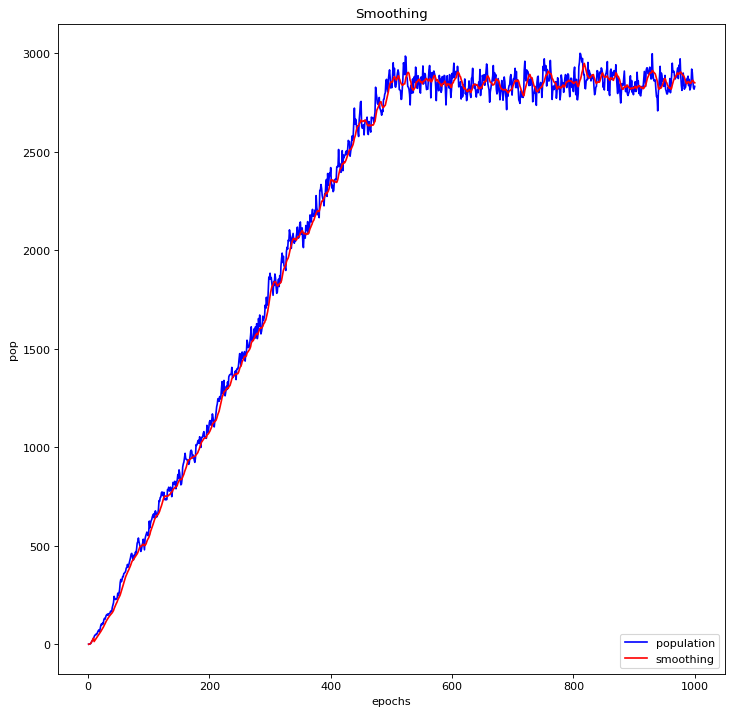

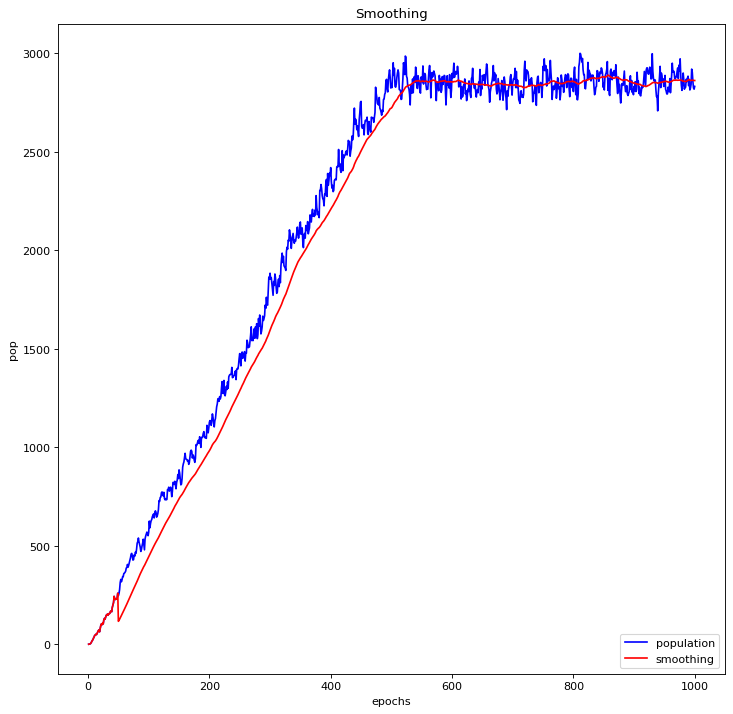

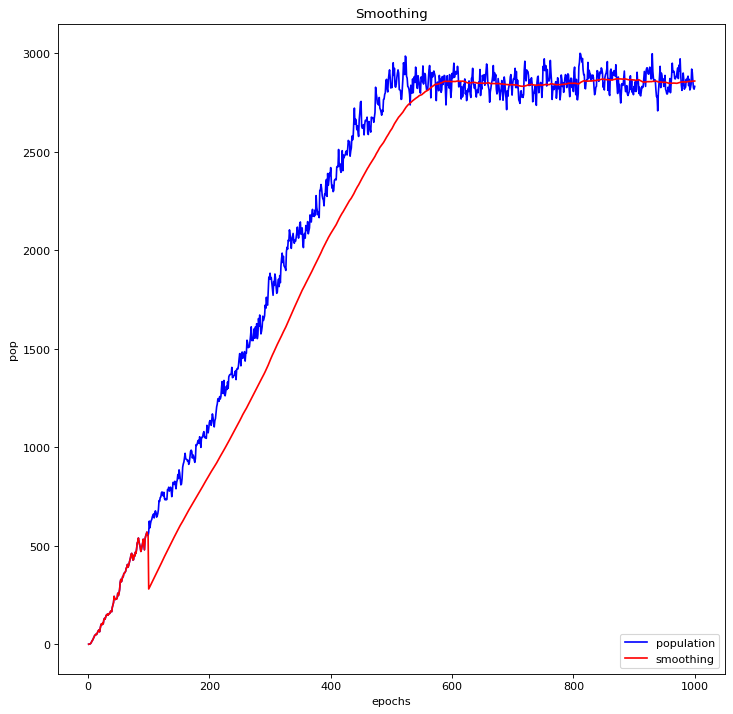

In [39]:
# применение скользящего среднего
for k in [10, 50, 100]:
  smoothing_data = population[:k - 1 ]
  for i in range(k - 1 , len(population)):
    y_i =  np.average(population[i-(k-1): i+1])
    smoothing_data = pd.concat([smoothing_data, pd.Series(y_i)], ignore_index=True)
  print_smoothing_in_one_window(print_data1=population, print_data2=smoothing_data, x=time)
  

## Примеры применения последовательного экспоненциального сглаживания с a=0.25


In [8]:
data = read_files("/content/drive/MyDrive/sim_tables/kurkin2/kurkin2dd_0.02_death_r0.2_auto_stop_at_plateau__b_0.2TRUE_initial_pop_10_sd_b_0.2_sd_d_0.7")

read description from file   /content/drive/MyDrive/sim_tables/kurkin2/kurkin2dd_0.02_death_r0.2_auto_stop_at_plateau__b_0.2TRUE_initial_pop_10_sd_b_0.2_sd_d_0.7/description.txt
read file  /content/drive/MyDrive/sim_tables/kurkin2/kurkin2dd_0.02_death_r0.2_auto_stop_at_plateau__b_0.2TRUE_initial_pop_10_sd_b_0.2_sd_d_0.7/population.csv
read file  /content/drive/MyDrive/sim_tables/kurkin2/kurkin2dd_0.02_death_r0.2_auto_stop_at_plateau__b_0.2TRUE_initial_pop_10_sd_b_0.2_sd_d_0.7/exp_pop.csv
read file  /content/drive/MyDrive/sim_tables/kurkin2/kurkin2dd_0.02_death_r0.2_auto_stop_at_plateau__b_0.2TRUE_initial_pop_10_sd_b_0.2_sd_d_0.7/exp_pop2.csv
read file  /content/drive/MyDrive/sim_tables/kurkin2/kurkin2dd_0.02_death_r0.2_auto_stop_at_plateau__b_0.2TRUE_initial_pop_10_sd_b_0.2_sd_d_0.7/exp_pop3.csv
read file  /content/drive/MyDrive/sim_tables/kurkin2/kurkin2dd_0.02_death_r0.2_auto_stop_at_plateau__b_0.2TRUE_initial_pop_10_sd_b_0.2_sd_d_0.7/exp_pop4.csv
read file  /content/drive/MyDrive/si

dd=0.02
death_r=0.2
epochs_count=4000
plateau_threshold=8
area_length_x=100
initial_pop=10
auto_stop_at_plateau=TRUE
b=0.2
sd_b=0.2
sd_d=0.7
found_plateau=TRUE
realtime_limit_reached=FALSE



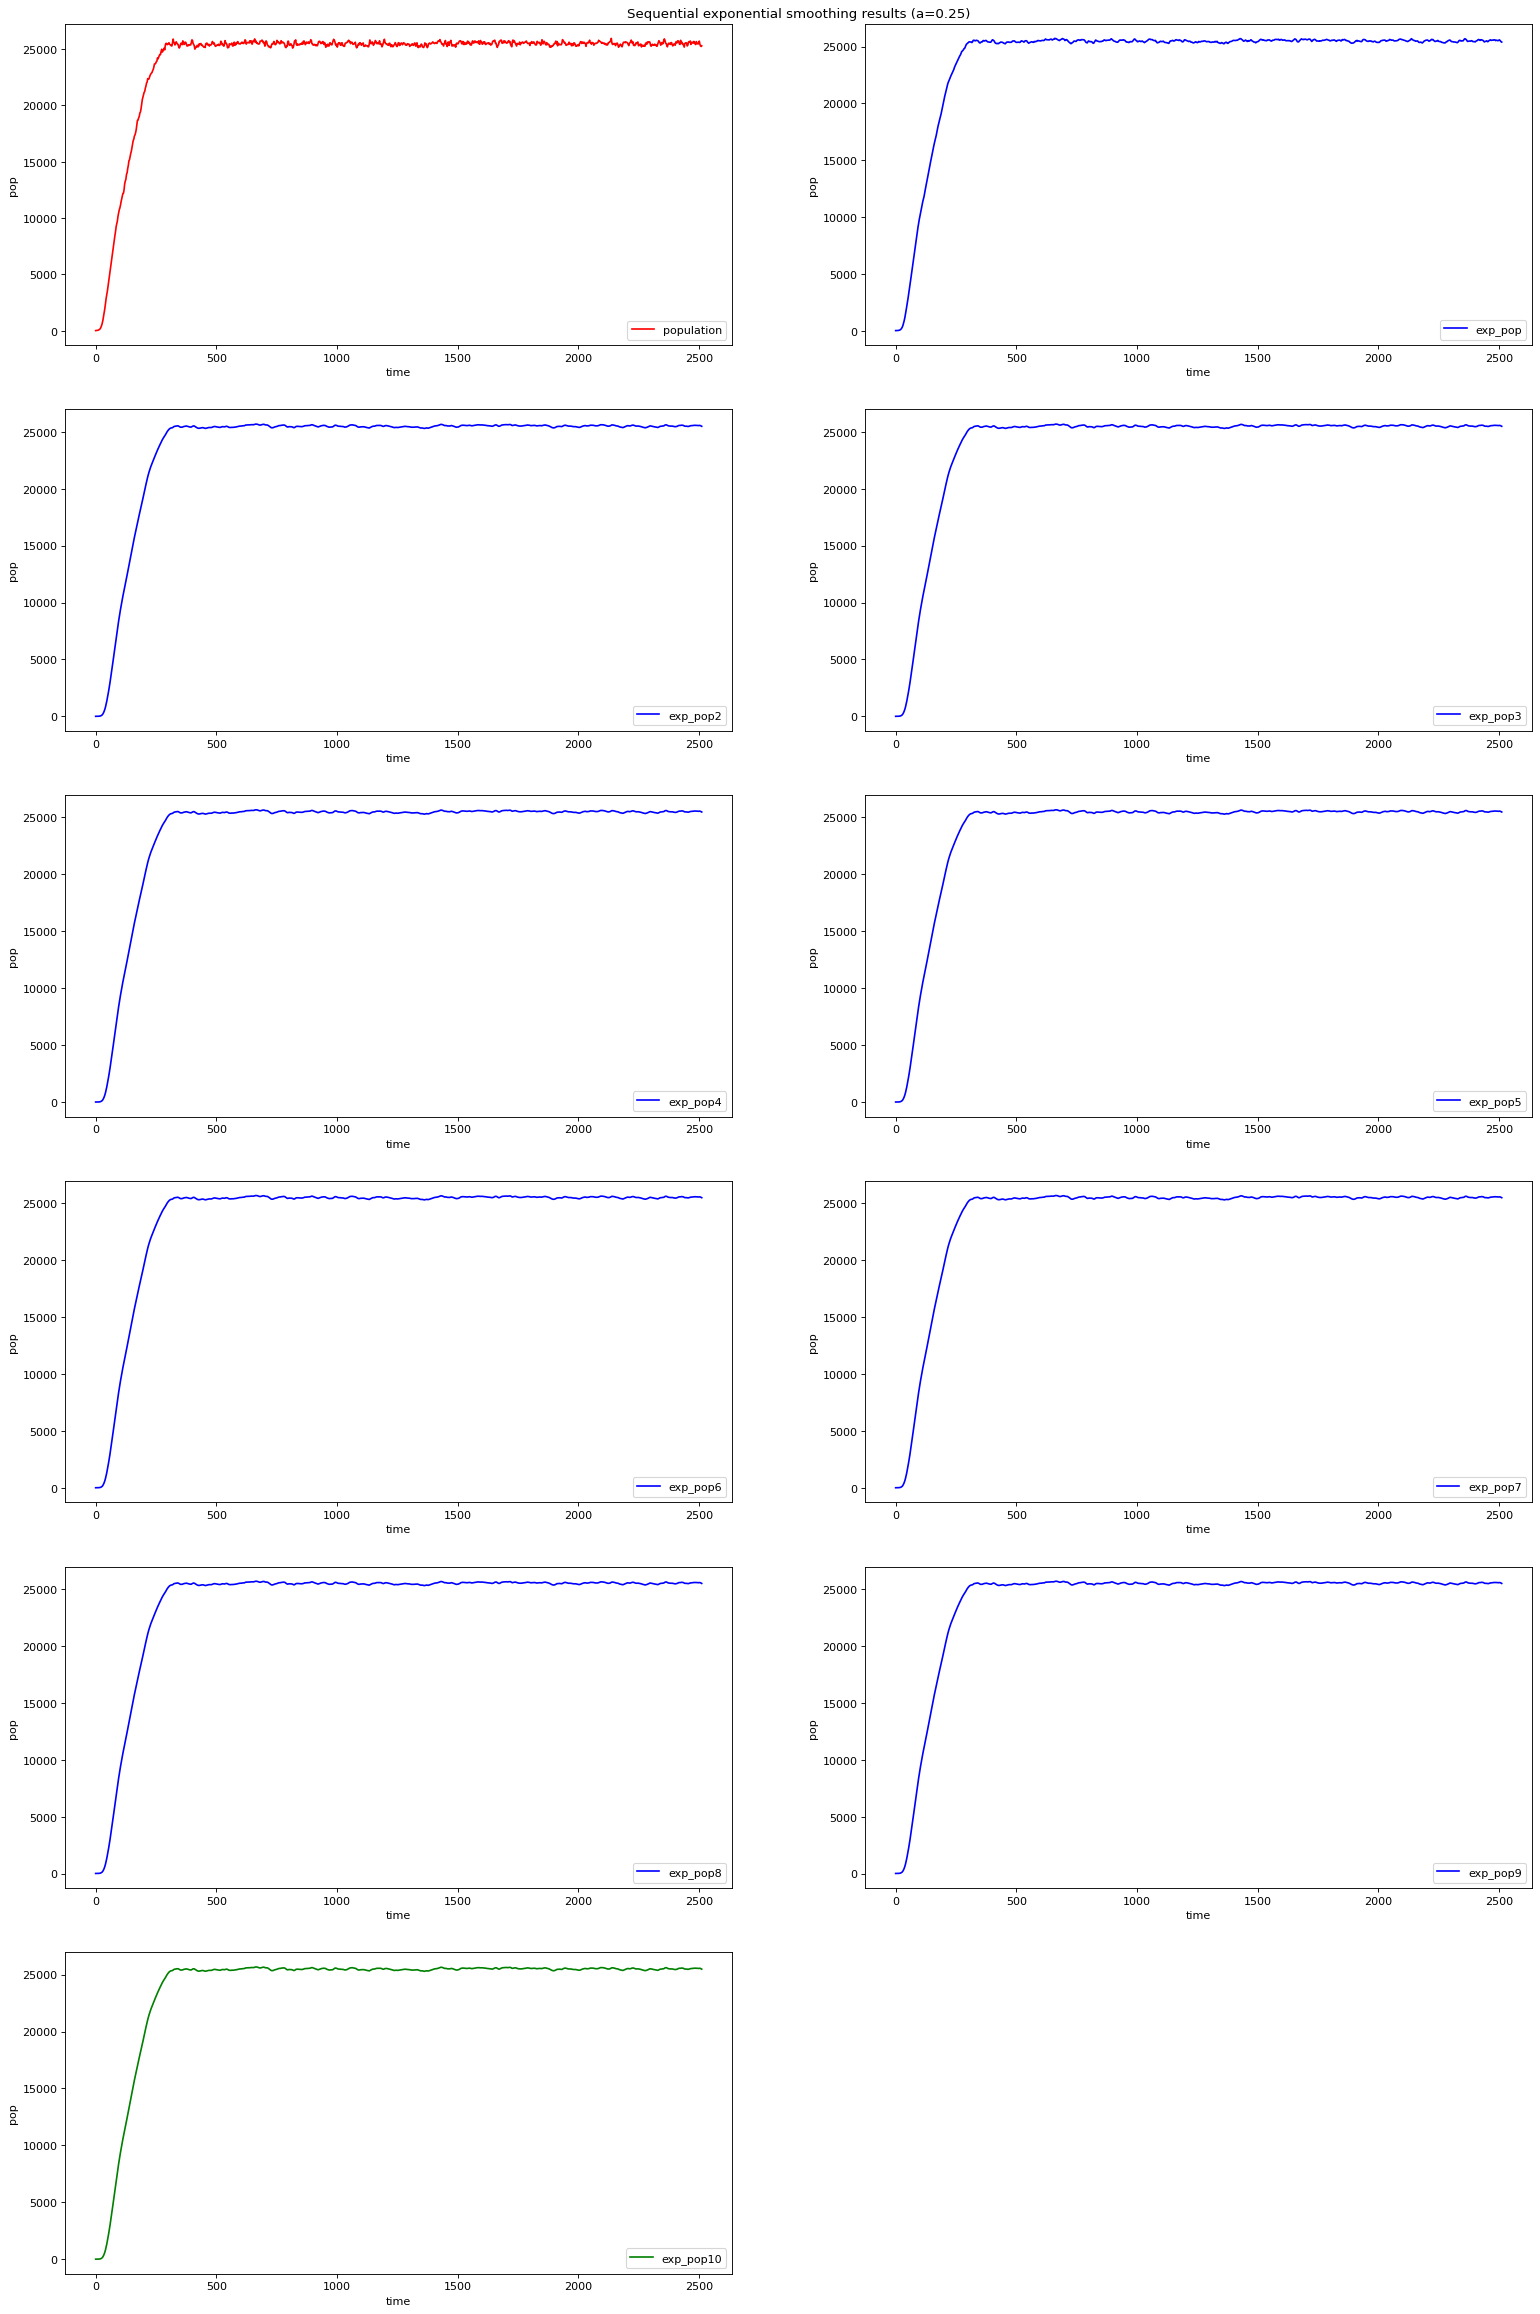

In [9]:
print_smoothing(data)
print(data["description_str"])

In [10]:
data3 = read_files("/content/drive/MyDrive/sim_tables/smoothing/smoothingdd_0.1_death_r0.2_auto_stop_at_plateau__b_0.1TRUE_initial_pop_1_sd_b_0.2_sd_d_1")

read description from file   /content/drive/MyDrive/sim_tables/smoothing/smoothingdd_0.1_death_r0.2_auto_stop_at_plateau__b_0.1TRUE_initial_pop_1_sd_b_0.2_sd_d_1/description.txt
read file  /content/drive/MyDrive/sim_tables/smoothing/smoothingdd_0.1_death_r0.2_auto_stop_at_plateau__b_0.1TRUE_initial_pop_1_sd_b_0.2_sd_d_1/population.csv
read file  /content/drive/MyDrive/sim_tables/smoothing/smoothingdd_0.1_death_r0.2_auto_stop_at_plateau__b_0.1TRUE_initial_pop_1_sd_b_0.2_sd_d_1/exp_pop.csv
read file  /content/drive/MyDrive/sim_tables/smoothing/smoothingdd_0.1_death_r0.2_auto_stop_at_plateau__b_0.1TRUE_initial_pop_1_sd_b_0.2_sd_d_1/exp_pop2.csv
read file  /content/drive/MyDrive/sim_tables/smoothing/smoothingdd_0.1_death_r0.2_auto_stop_at_plateau__b_0.1TRUE_initial_pop_1_sd_b_0.2_sd_d_1/exp_pop3.csv
read file  /content/drive/MyDrive/sim_tables/smoothing/smoothingdd_0.1_death_r0.2_auto_stop_at_plateau__b_0.1TRUE_initial_pop_1_sd_b_0.2_sd_d_1/exp_pop4.csv
read file  /content/drive/MyDrive/si

dd=0.1
death_r=0.2
epochs_count=2000
plateau_threshold=8
area_length_x=100
initial_pop=1
auto_stop_at_plateau=TRUE
b=0.1
sd_b=0.2
sd_d=1
found_plateau=TRUE
realtime_limit_reached=FALSE



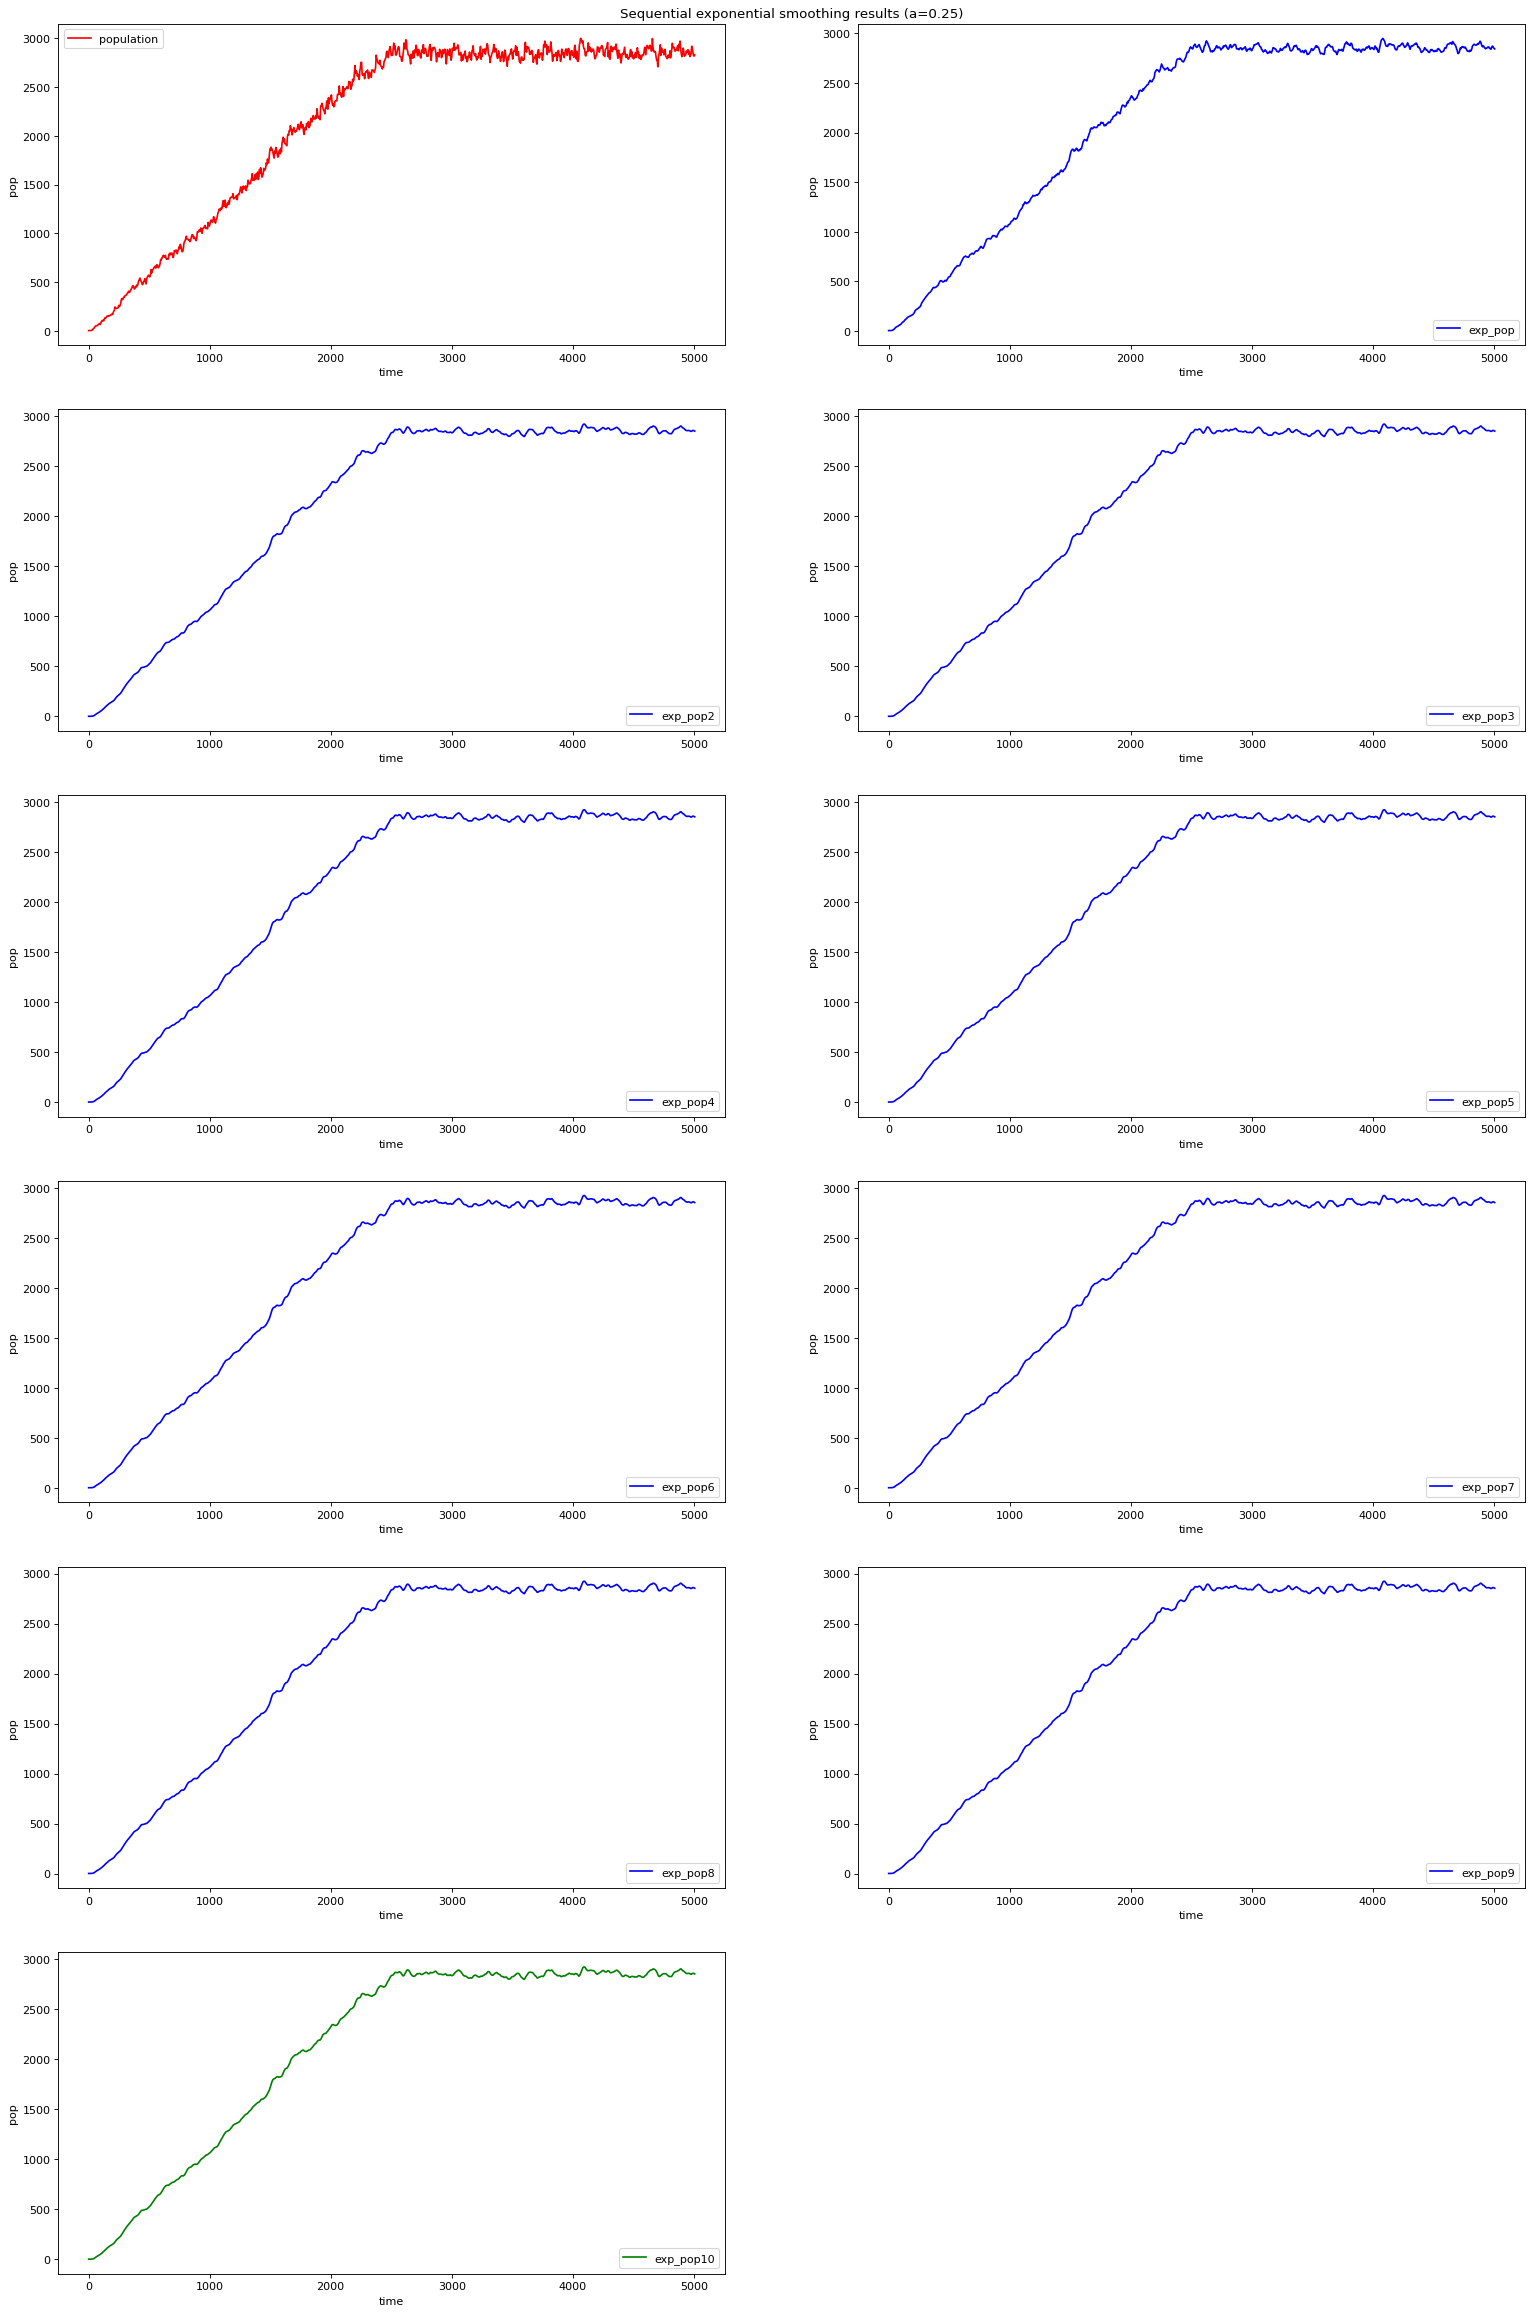

In [11]:
print_smoothing(data3)
print(data3["description_str"])

In [12]:
print(data3["population"].describe())

            epochs         time          pop
count  1000.000000  1000.000000  1000.000000
mean    500.500000  2509.667801  2155.177000
std     288.819436  1445.003117   922.514705
min       1.000000     0.000000     1.000000
25%     250.750000  1260.816620  1439.500000
50%     500.500000  2508.829441  2765.000000
75%     750.250000  3760.899117  2856.000000
max    1000.000000  5008.017457  3000.000000


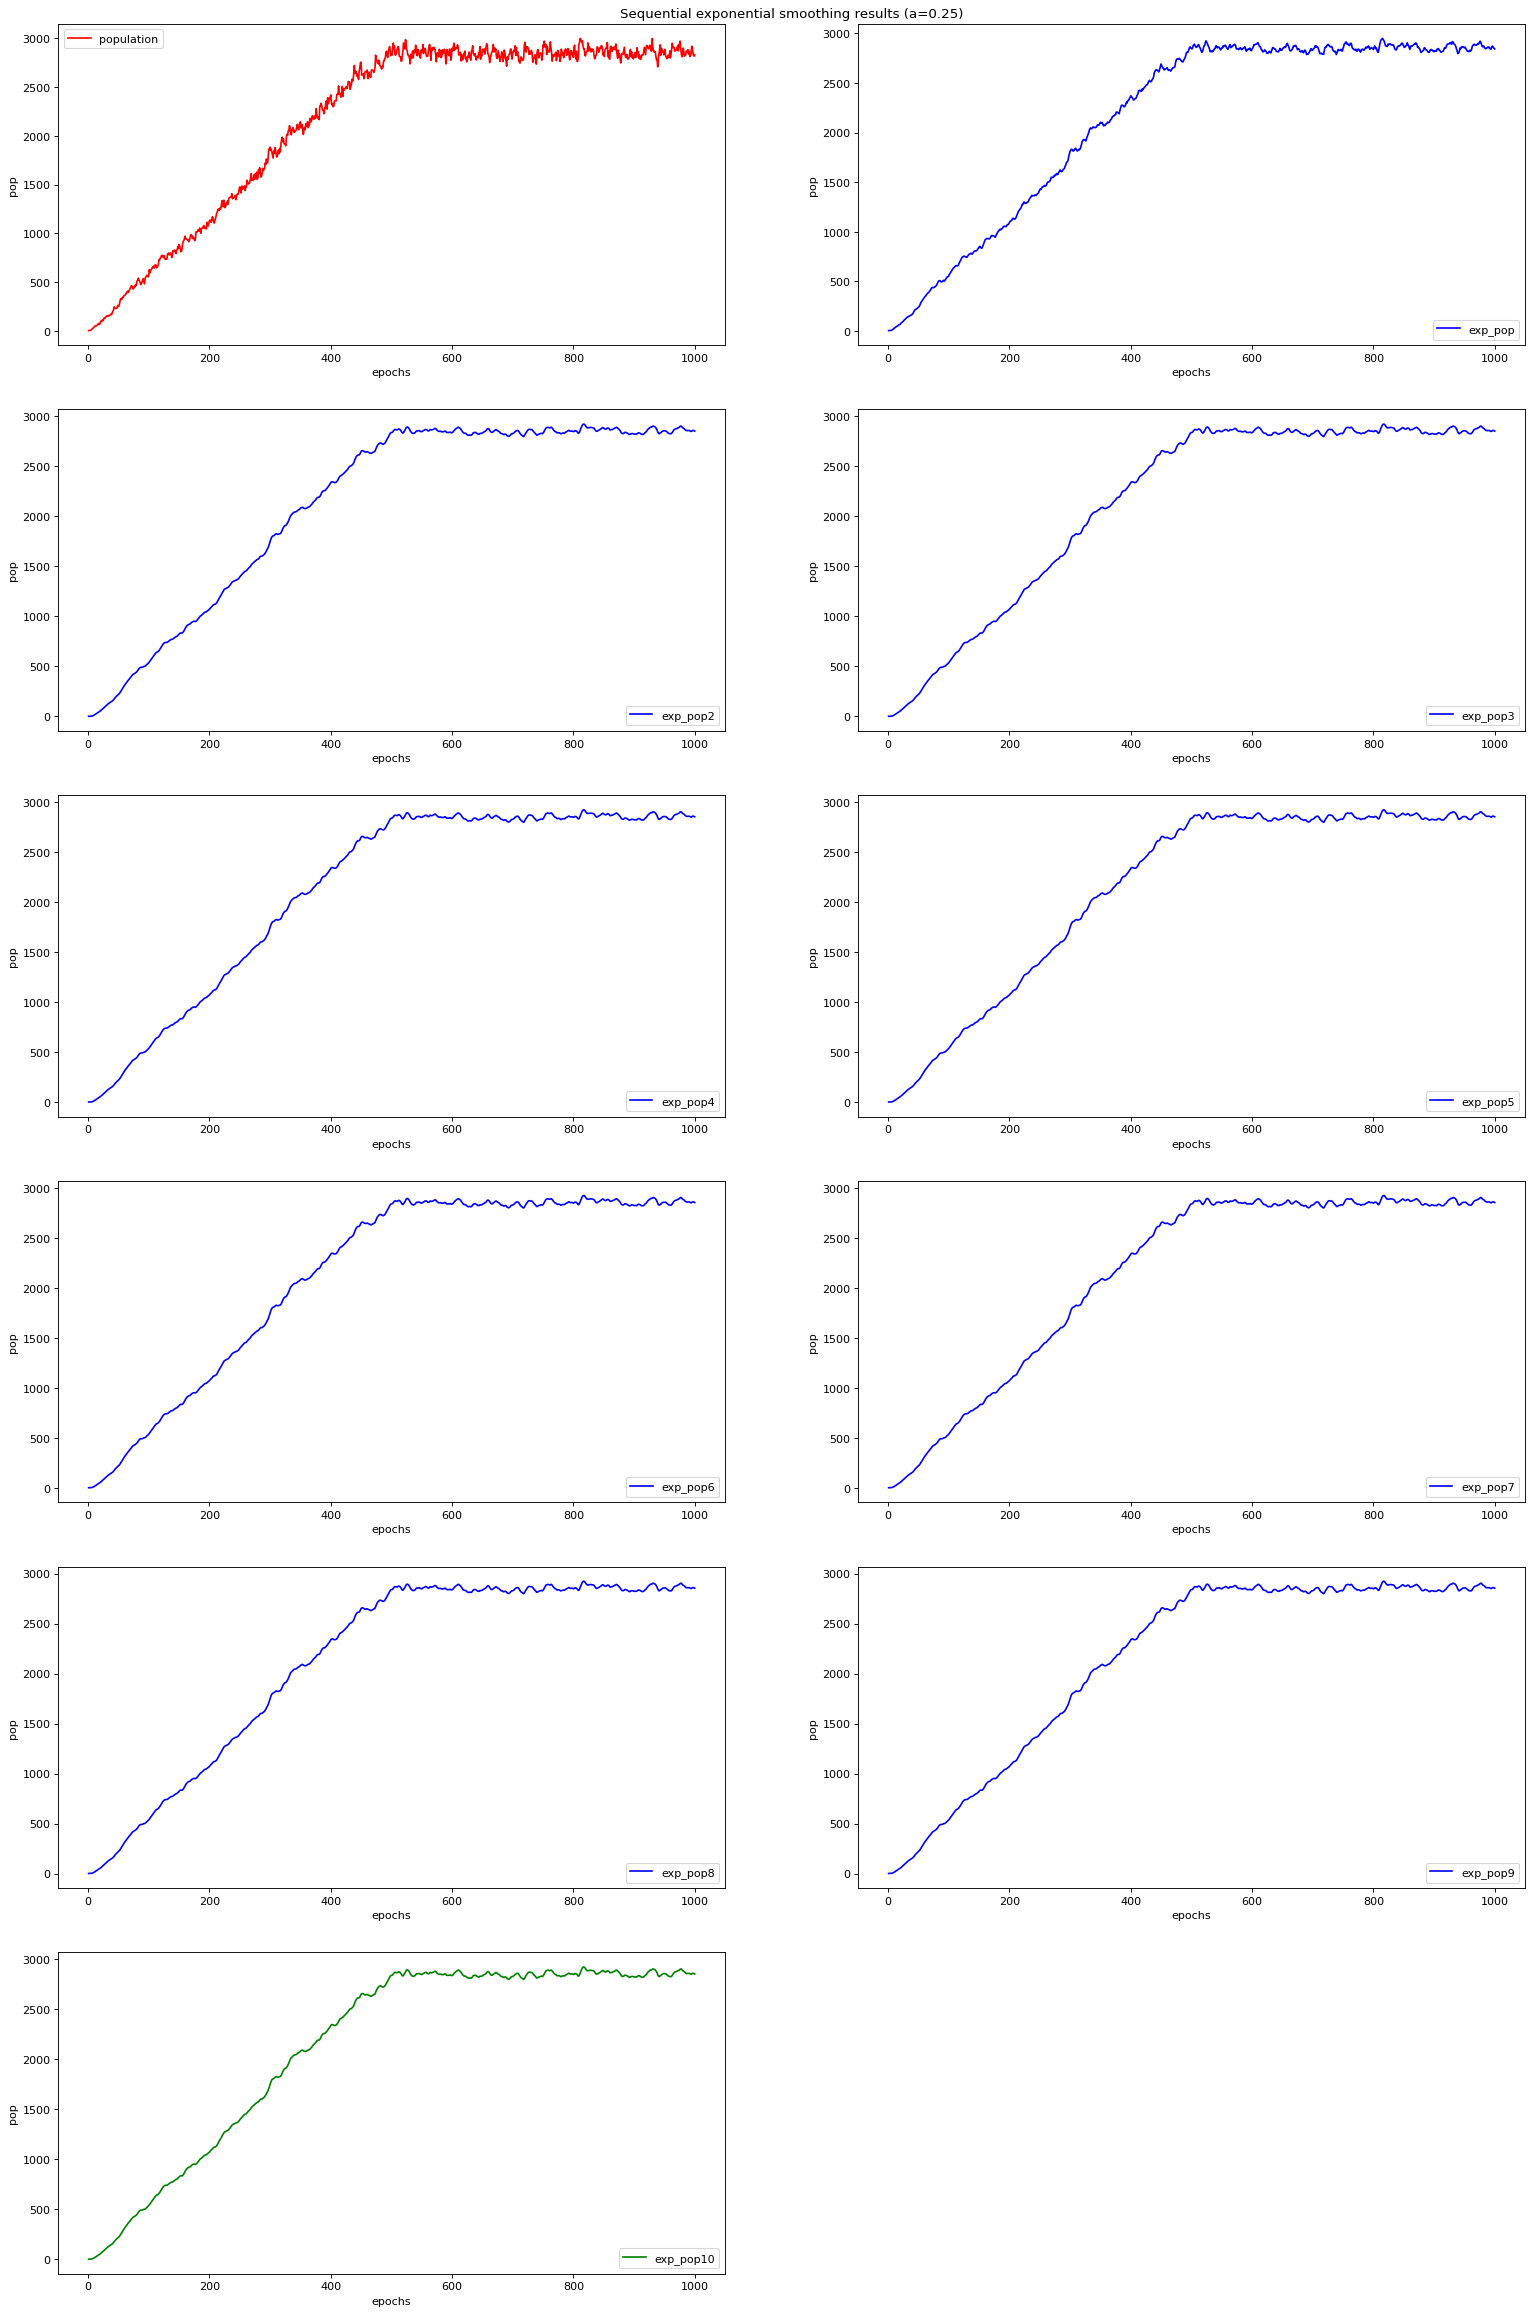

In [13]:
print_smoothing(data3, x='epochs')